In [1]:
import numpy as np
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from collections import defaultdict
%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'SimHei'

In [2]:
popu = pd.read_csv('population.csv',index_col='日付',parse_dates=True)

In [3]:
popu

,渋谷,新宿,丸の内,品川,下北沢,八王子,大阪難波,札幌大通,仙台駅,福岡天神
日付,,,,,,,,,,
2020-01-01,40300,32800,81600,28900,6700,4600,32500,8200,14100,10900
2020-01-02,59500,60300,118000,36300,8600,7400,52200,22200,36300,32600
2020-01-03,70000,60100,120000,40200,8900,7000,56300,19600,33400,28200
2020-01-04,78100,64400,118000,40100,10600,8200,57400,21200,31600,28200
2020-01-05,64100,52500,103000,36600,9400,6400,44200,17900,24800,20800
...,...,...,...,...,...,...,...,...,...,...
2021-09-18,50700,38200,53000,20100,12000,4400,25500,11400,15000,11400
2021-09-19,62200,46900,59400,21800,15000,4900,30200,10100,16800,10200
2021-09-20,57300,43100,61200,23300,14800,4900,26500,9700,15500,9400


In [4]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

In [11]:
for train, test in tscv.split(popu):
    print(train)
    print("test:",test)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159]
test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244

In [12]:
_shift_1=popu.shift(1)['渋谷'].dropna()
_shift_2=popu.shift(-1)['品川'].dropna()

In [17]:
_shift_2

日付
2020-01-01    36300.0
2020-01-02    40200.0
2020-01-03    40100.0
2020-01-04    36600.0
2020-01-05    90500.0
               ...   
2021-09-17    20100.0
2021-09-18    21800.0
2021-09-19    23300.0
2021-09-20    40000.0
2021-09-21    39700.0
Name: 品川, Length: 630, dtype: float64

In [18]:
pd.DataFrame(_shift_1.align(_shift_2,join='inner',axis=0))

日付,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,...,2021-09-12,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,2021-09-18,2021-09-19,2021-09-20,2021-09-21
渋谷,40300.0,59500.0,70000.0,78100.0,64100.0,111000.0,111000.0,110000.0,115000.0,123000.0,...,58900.0,51300.0,62800.0,60600.0,63500.0,62900.0,67300.0,50700.0,62200.0,57300.0
品川,40200.0,40100.0,36600.0,90500.0,91200.0,92800.0,94800.0,99400.0,48800.0,40100.0,...,37300.0,35500.0,37300.0,37800.0,40800.0,20100.0,21800.0,23300.0,40000.0,39700.0


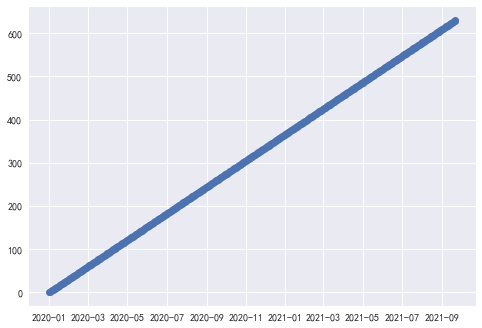

In [14]:
plt.plot_date(popu.index,np.arange(len(popu.index)))

In [12]:
import statsmodels.api as sm

dp = sm.tsa.deterministic.DeterministicProcess(
    index=popu.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

AttributeError: module 'statsmodels.tsa.api' has no attribute 'deterministic'

In [2]:
popu = pd.read_csv('population.csv',index_col='日付',parse_dates=True)
submit = pd.read_csv('sample_submit.csv',header=None)
sibu = popu['渋谷']
sinjyu = popu['新宿']
sibu_diff = (sibu - sibu.shift()).dropna()
sinjyu_diff = (sinjyu - sinjyu.shift()).dropna()
# test = popu.loc['2021-08-30':,:]
popu = popu.loc['2020-03-01':,:]  # 尝试从3月份开始预测
# word = pd.read_csv('word.csv',index_col='日付',parse_dates=True)
# word_info = word.describe().T
# word = word.T[word_info['mean']>1000].T
# word = word.loc['2020-04-02':,:]


# # 得到于每个地点关联的词语
# cols = popu.columns
# col_dict = {}
# for col in cols:
#     temp = popu[col]
#     threshold = popu.describe().loc['75%'][col]
#     y = (temp > threshold).astype('int')
#     count_dict = defaultdict(int)
#     for i in range(100):
#         features = choose_features(y)
#         for feature in features:
#             count_dict[feature] += 1
#     col_dict[col] = count_dict

# def choose_features(y):
#     clf = DecisionTreeClassifier()
#     clf.fit(word.loc['2020-03-01':,:],y)
#     alist = list(zip(word.columns,clf.feature_importances_))
#     alist.sort(key=lambda x:x[1],reverse=True)
#     return [i[0] for i in alist[:20]]

In [4]:
# 比较是否使用差分,ADF检定
def adf_check(data):
    res_ctt = sm.tsa.stattools.adfuller(data, regression="ctt") # トレンド項あり（２次）、定数項あり
    res_ct = sm.tsa.stattools.adfuller(data, regression="ct") # トレンド項あり（１次）、定数項あり
    res_c = sm.tsa.stattools.adfuller(data, regression="c") # トレンド項なし、定数項あり
    res_nc = sm.tsa.stattools.adfuller(data, regression="nc") # トレンド項なし、定数項なし
    print(res_ctt)
    print(res_ct)
    print(res_c)
    print(res_nc)

In [15]:
adf_check(sibu)
print('--------------------------')
adf_check(sibu_diff)

(-3.8201422281033883, 0.05167709670951997, 15, 591, {'1%': -4.390841952334511, '5%': -3.842419056381916, '10%': -3.5594676784733186}, 12035.614563788116)
(-4.188119672502819, 0.004665469205184167, 15, 591, {'1%': -3.97417031406408, '5%': -3.4179448549018057, '10%': -3.131436303486363}, 12035.983939560518)
(-3.308010655684143, 0.014524173252996965, 15, 591, {'1%': -3.4414632489439714, '5%': -2.866442840548375, '10%': -2.5693810879206143}, 12040.68026631329)
(-1.5872384189285094, 0.105939430516728, 15, 591, {'1%': -2.569533463715461, '5%': -1.9414639667465587, '10%': -1.616378239591934}, 12045.56918487659)
--------------------------
(-7.663314088293859, 2.182985418016351e-09, 19, 586, {'1%': -4.391011053495308, '5%': -3.8425049461549623, '10%': -3.5595207807384397}, 12004.960823346664)
(-7.3652372076060875, 2.078650456299181e-09, 19, 586, {'1%': -3.974302427673727, '5%': -3.4180086892975865, '10%': -3.1314738278580014}, 12007.640089652601)
(-7.284290551990953, 1.4726352780233561e-10, 19,

In [16]:
adf_check(sinjyu)
print('--------------------------')
adf_check(sinjyu_diff)

(-3.4050568422248793, 0.13886932817157693, 15, 591, {'1%': -4.390841952334511, '5%': -3.842419056381916, '10%': -3.5594676784733186}, 11576.622971420837)
(-3.6240129226003557, 0.027874599549031636, 15, 591, {'1%': -3.97417031406408, '5%': -3.4179448549018057, '10%': -3.131436303486363}, 11576.894990188197)
(-3.062302809367296, 0.02947167320293071, 15, 591, {'1%': -3.4414632489439714, '5%': -2.866442840548375, '10%': -2.5693810879206143}, 11578.94192726777)
(-1.400310640059723, 0.1502914755084918, 15, 591, {'1%': -2.569533463715461, '5%': -1.9414639667465587, '10%': -1.616378239591934}, 11583.364731129423)
--------------------------
(-7.083053996246637, 5.165276290100119e-08, 19, 586, {'1%': -4.391011053495308, '5%': -3.8425049461549623, '10%': -3.5595207807384397}, 11546.690036349064)
(-6.842469921302789, 3.200322387700292e-08, 19, 586, {'1%': -3.974302427673727, '5%': -3.4180086892975865, '10%': -3.1314738278580014}, 11548.227422483465)
(-6.796591389495552, 2.2926584882997455e-09, 19,

问题在上：使用了内置函数后,aic在模型适配时有时会出现大幅波动导致预测错误。
+ 解决方案，不使用他的最佳选择函数，而是使用自己的方法进行遍历，选择最小的，基本不会错。
+ 固定周期sd=1

best_params:[(4, 0, 3, 1, 1, 1)],best_aic:11230.638327828001
best_params:[(4, 1, 1, 1, 1, 1)],best_aic:10821.781146129026
best_params:[(4, 1, 3, 0, 1, 1)],best_aic:11894.163945391983
best_params:[(4, 0, 3, 0, 1, 1)],best_aic:11226.151231515849
best_params:[(4, 1, 1, 1, 1, 1)],best_aic:9654.493525606398
best_params:[(1, 1, 3, 0, 1, 1)],best_aic:8622.744205383287
best_params:[(4, 1, 0, 1, 1, 1)],best_aic:10433.06916894831
best_params:[(4, 1, 1, 1, 1, 1)],best_aic:10045.935823801112
best_params:[(4, 1, 1, 1, 1, 1)],best_aic:9878.314099055118
best_params:[(4, 1, 1, 1, 1, 1)],best_aic:10027.21013140006
result:           0             1             2             3             4   \
0  2021/9/27  62091.994905  46202.409159  77688.359260  34432.989886   
1  2021/9/28  64430.458722  47952.770822  84892.402494  37577.745668   
2  2021/9/29  65274.626088  48287.918811  85738.857871  38661.247339   
3  2021/9/30  63912.218408  47693.749327  84858.076687  37892.079760   
4  2021/10/1  67992.509205 

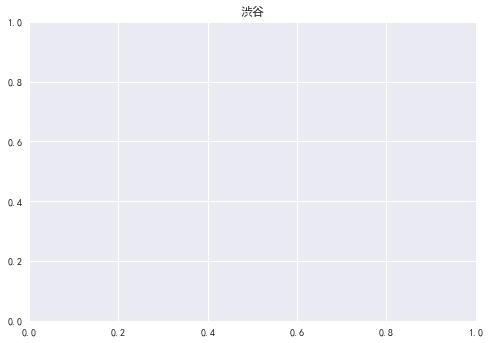

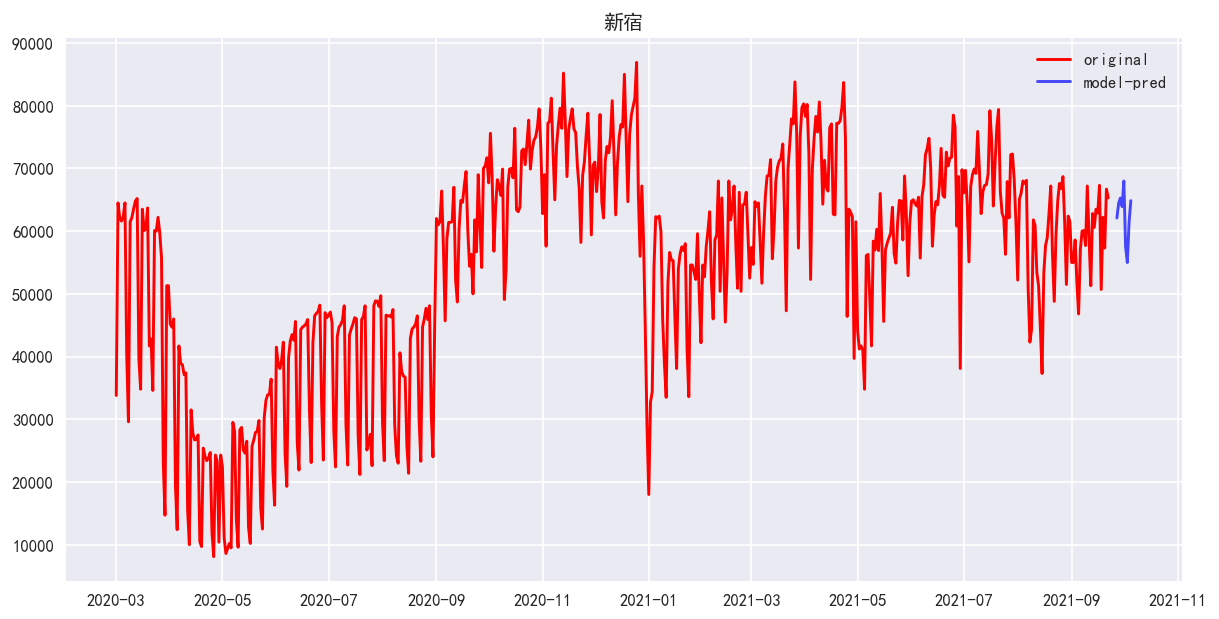

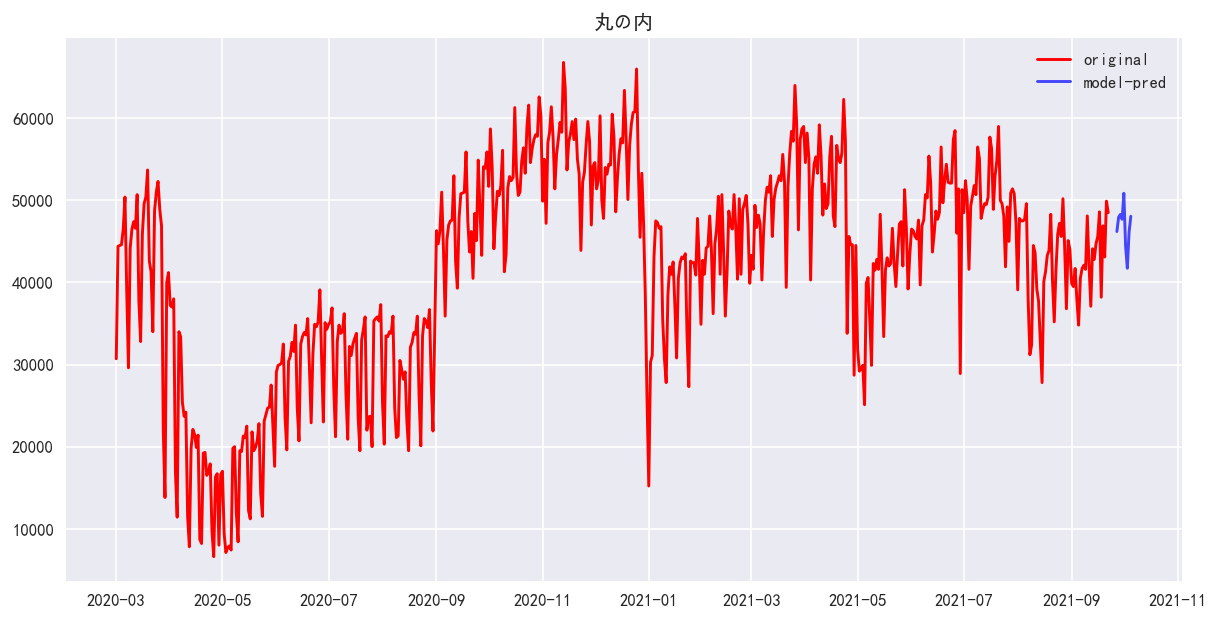

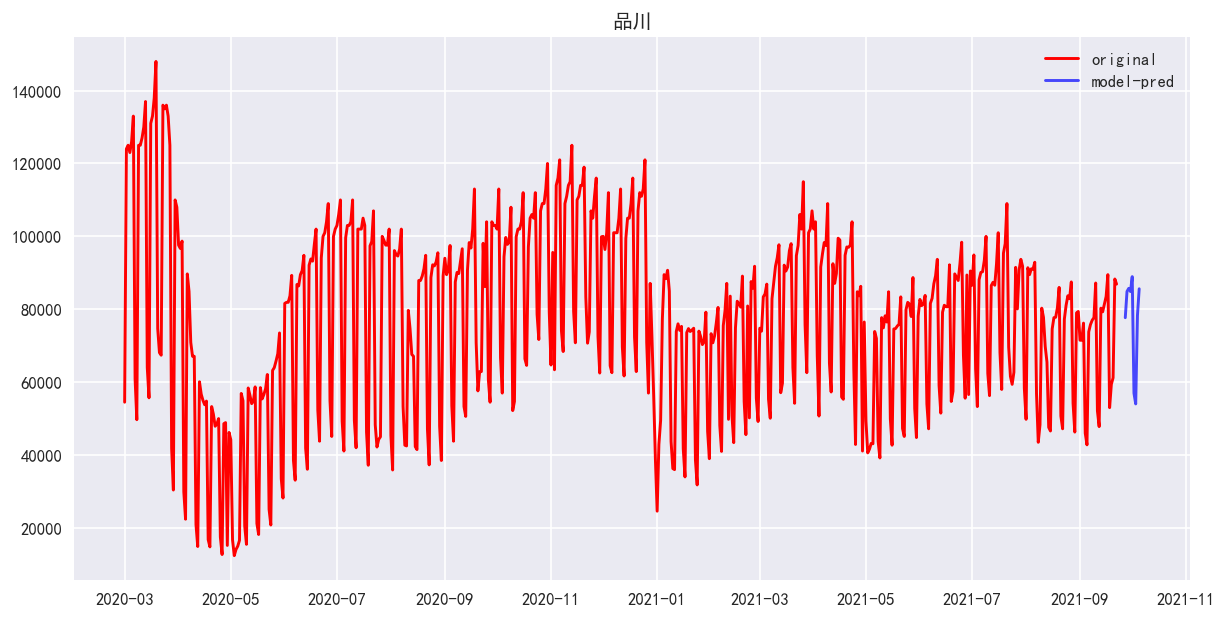

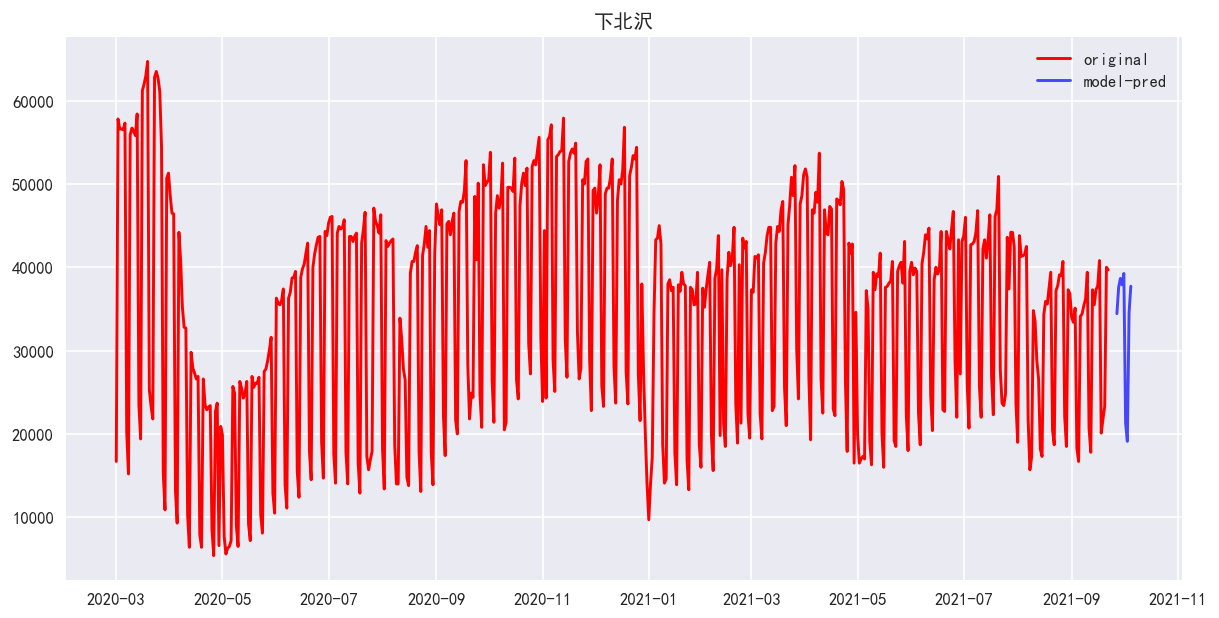

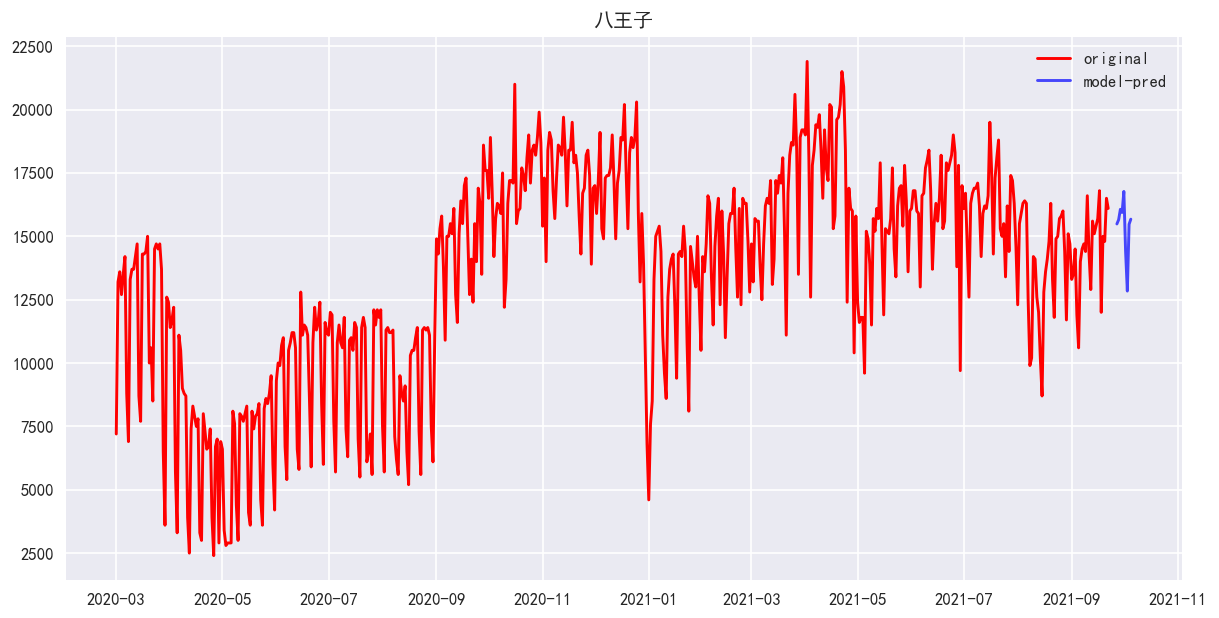

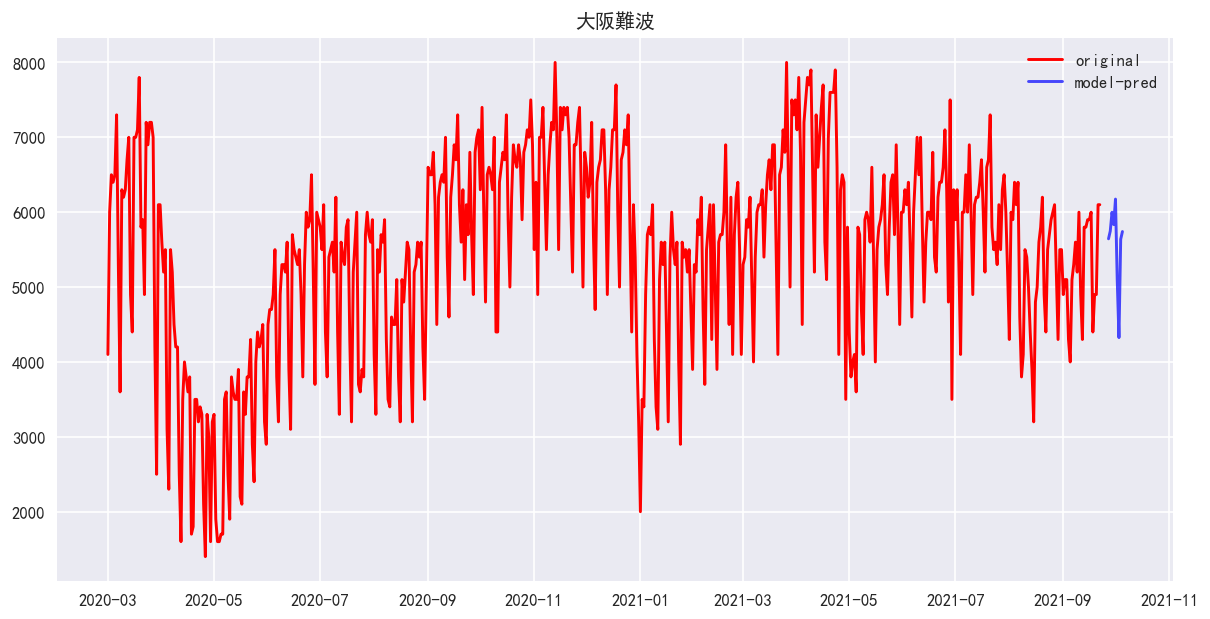

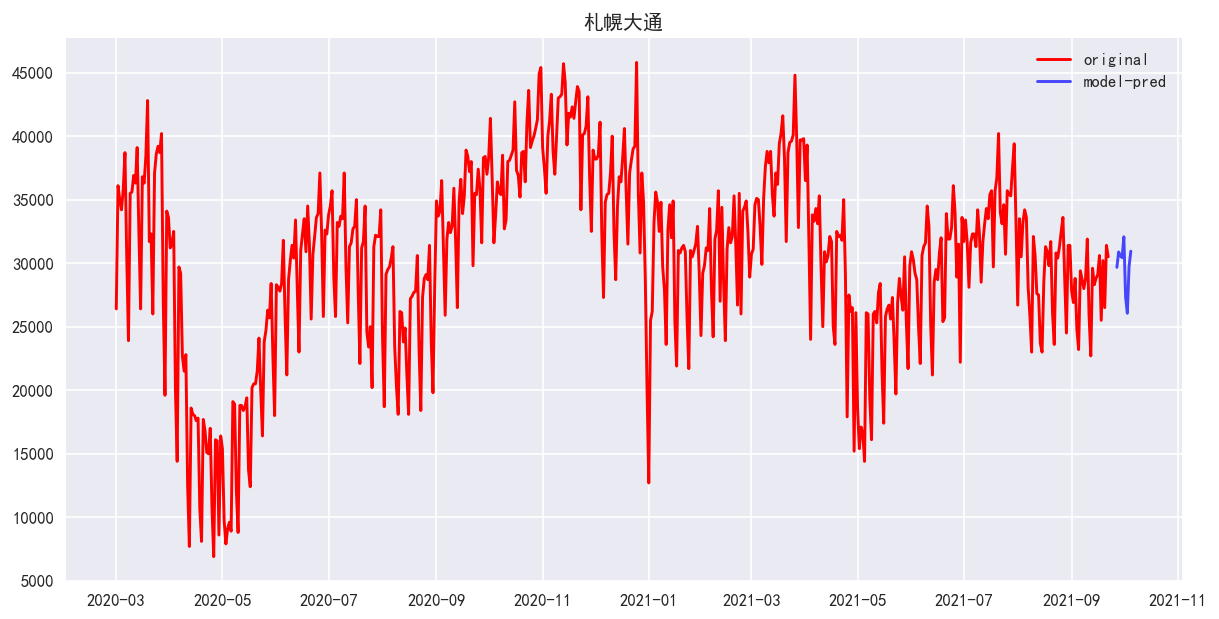

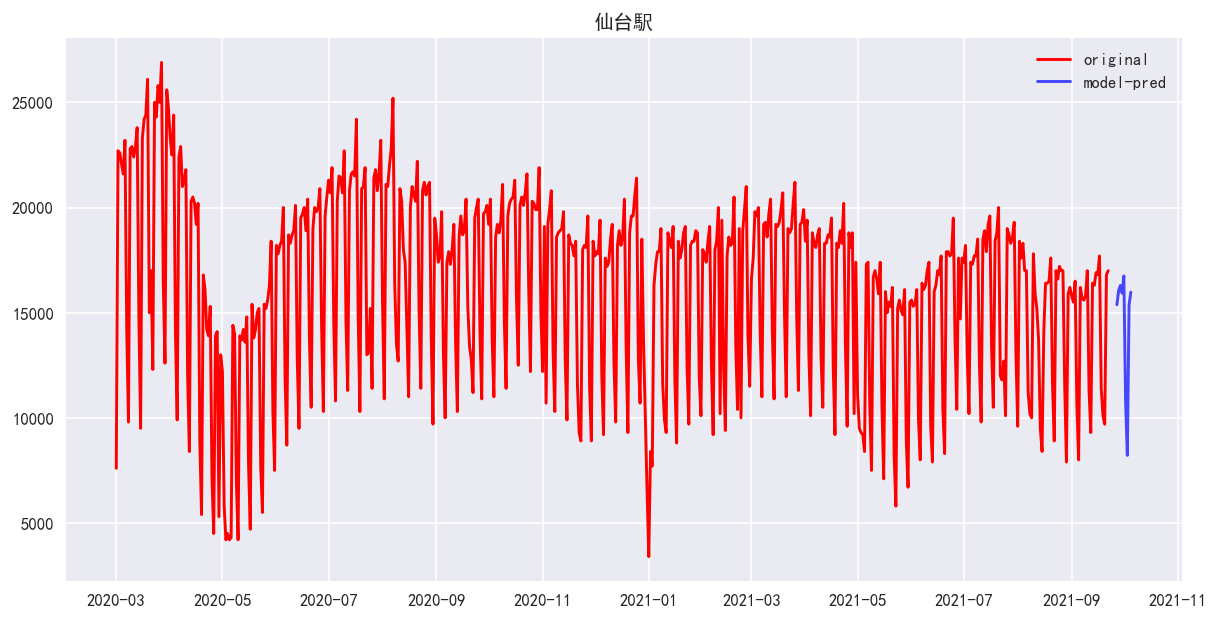

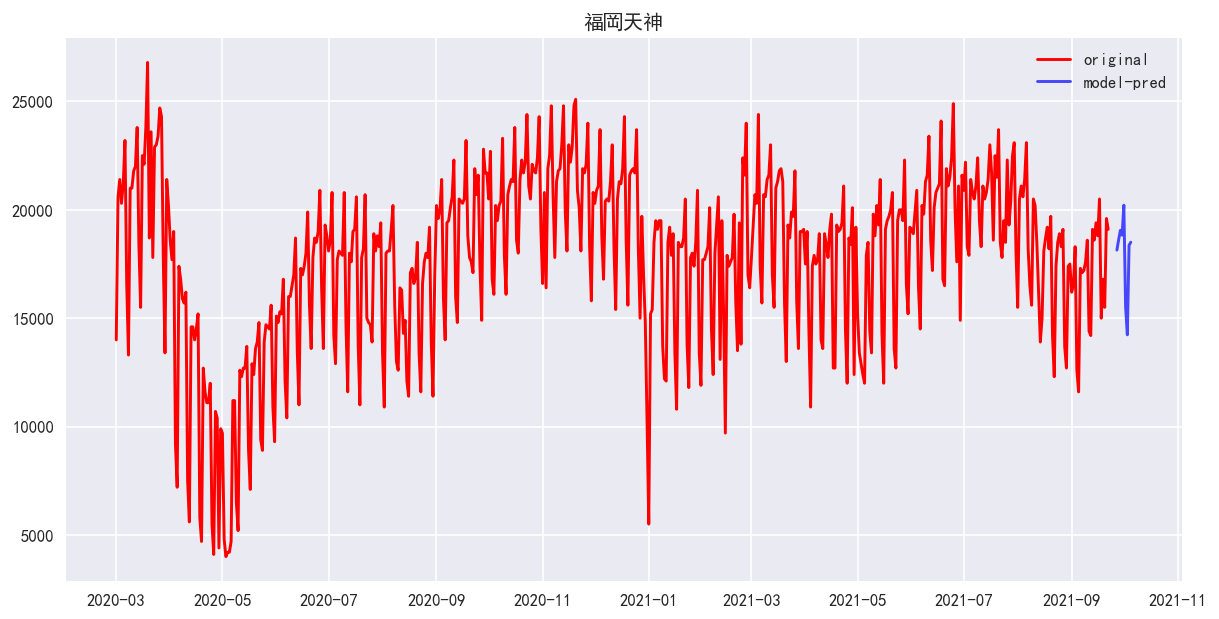

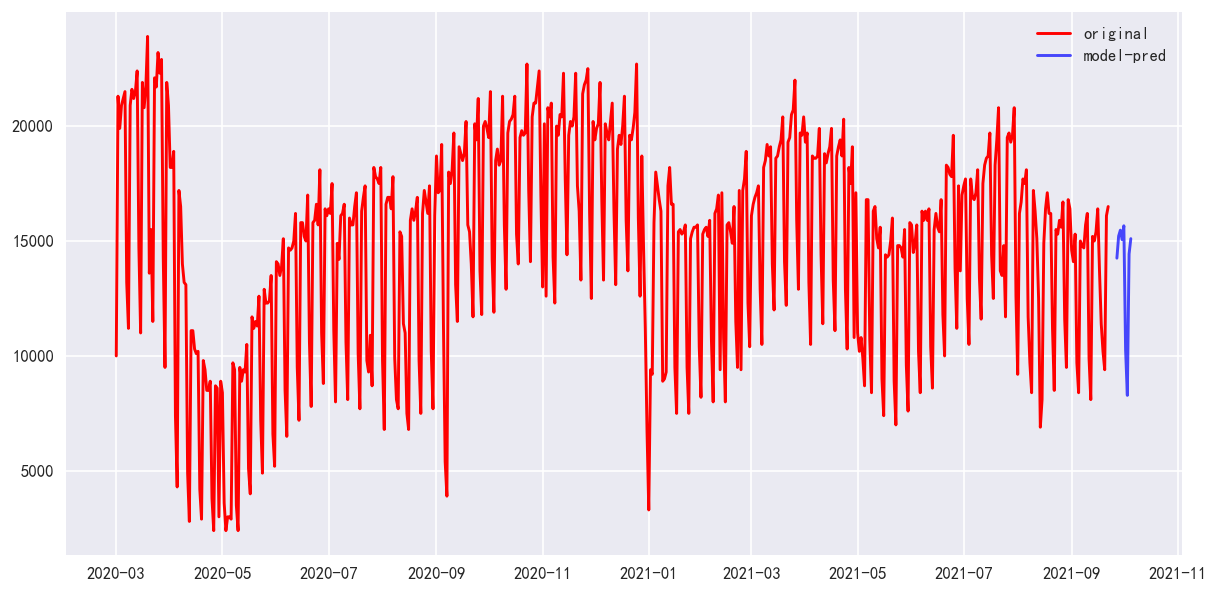

In [6]:
def find_best(col_name):
    # SARIMAパラメター最適化（総当たりチェック）
    import warnings
    warnings.filterwarnings('ignore') # 警告非表示（収束：ConvergenceWarning）
    # パラメータ範囲
    # order(p, d, q)
    min_p = 1; max_p = 4 # min_pは1以上を指定しないとエラー
    min_d = 0; max_d = 1
    min_q = 0; max_q = 3 

    # seasonal_order(sp, sd, sq)
    min_sp = 0; max_sp = 1
    min_sd = 1; max_sd = 1
    min_sq = 0; max_sq = 1
    test_pattern = (max_p - min_p +1)*(max_q - min_q + 1)*(max_d - min_d + 1)*(max_sp - min_sp + 1)*(max_sq - min_sq + 1)*(max_sd - min_sd + 1)
    sfq = 7 # seasonal_order周期パラメータ
    ts = popu[col_name]
    test_results = pd.DataFrame(index=range(test_pattern), columns=["model_parameters", "aic"])
    num = 0
    for p in range(min_p, max_p + 1):
        for d in range(min_d, max_d + 1):
            for q in range(min_q, max_q + 1):
                for sp in range(min_sp, max_sp + 1):
                    for sd in range(min_sd, max_sd + 1):
                        for sq in range(min_sq, max_sq + 1):
                            sarima = sm.tsa.SARIMAX(
                                ts, order=(p, d, q), 
                                seasonal_order=(sp, sd, sq, sfq), 
                                enforce_stationarity = False, 
                                enforce_invertibility = False
                            ).fit()
                            test_results.iloc[num]["model_parameters"] = (p,d,q,sp,sd,sq)
                            test_results.iloc[num]["aic"] = sarima.aic
                            num = num + 1
    best_params = test_results[test_results.aic == min(test_results.aic)].model_parameters.values
    best_aic = min(test_results.aic)
    print("best_params:{},best_aic:{}".format(best_params,best_aic))
    return test_results[test_results.aic == min(test_results.aic)].model_parameters.values[0]

def runing(col_name):
#     temp_diff = temp - temp.shift() # 差分(1階差)　Pandasのdiff()でpassengers.diff()としてもOK
#     temp_diff = temp_diff.dropna() # 1個できるNaNデータは捨てる
#     temp_diff.plot()
#     plt.show()
#     import warnings
#     warnings.filterwarnings('ignore') # 計算警告を非表示
#     # 自動ARMAパラメータ推定関数，使用1次差分data
#     res_selection = sm.tsa.arma_order_select_ic(temp_diff, ic='aic', trend='nc')
#     p,q = res_selection.get('aic_min_order')
#     acf_graph(temp_diff)
#     print('{}:{},{}'.format(col_name,p,q))
    params = find_best(col_name)
    return model_predict(col_name, params)
    
def acf_graph(temp_diff):
    # 差分系列のコレログラム
    fig = plt.figure(figsize=(8, 8),dpi=120)
    # 自己相関(ACF)のグラフ
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(temp_diff, lags=40, ax=ax1) #ACF計算とグラフ自動作成
    # 偏自己相関(PACF)のグラフ
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(temp_diff, lags=40, ax=ax2) #PACF計算とグラフ自動作成
    plt.tight_layout() # グラフ間スキマ調整
    
def model_predict(col_name, params):
    data = popu[col_name]
    period = 7
    p,d,q,sp,sd,sq = params
    sarimax = sm.tsa.SARIMAX(data, 
                            order=(p, d, q),
                            seasonal_order=(sp, sd, sq, period),
                            enforce_stationarity = False,
                            enforce_invertibility = False
                            ).fit()
    sarimax_pred = sarimax.predict('2021-09-27', '2021-10-05')
#     word_y_pred = sarimax_pred['2020-04-02':'2021-09-07']
#     extra_tune = word_predict(col_name, word_train)
    return sarimax_pred

# def word_predcit(col_name, y_pred):
#     from sklearn.ensemble import ExtraTreesRegressor
#     y = popu[col_name]['2020-04-02':'2021-09-07'] - y_pred
#     key_words = get_words(col_name)
#     X = word[key_words]
#     etr = ExtraTreesRegressor()
#     etr.fit(X,y)
#     X_test = 
#     etr.predict
    
def get_words(col_name):
    result = col_dict.get(col_name)
    result = pd.Series(result)
    words = result[result>50] # 循环100次为基准，出现80次以上
    return list(words.index)

def main():
    col = popu.columns
    for i in range(len(col)):
        col_name = col[i]
        sarimax_pred=runing(col_name)
        submit[i+1] = sarimax_pred.values
        # plot
        plt.title(col_name)
        plt.figure(figsize=(12, 6),dpi=120)
        plt.plot(popu[col_name], label="original",c='r')
        plt.plot(sarimax_pred, c="b", label="model-pred", alpha=0.7)
        plt.legend(loc='best')
    print('result:',submit)
    return submit
submit = main()

In [7]:
submit.to_csv('test3.csv',header=None,index=False)

In [8]:
submit

,0,1,2,3,4,5,6,7,8,9,10
0,2021/9/27,62091.994905,46202.409159,77688.359260,34432.989886,15487.804595,5644.442540,29670.086405,15377.027986,18141.363543,14253.916691
1,2021/9/28,64430.458722,47952.770822,84892.402494,37577.745668,15653.330321,5747.540000,30881.187059,16049.804391,18621.148360,15214.739981
2,2021/9/29,65274.626088,48287.918811,85738.857871,38661.247339,16064.260803,5999.100254,30580.761693,16294.894614,19054.812797,15471.999608
3,2021/9/30,63912.218408,47693.749327,84858.076687,37892.079760,15941.865249,5834.525048,30437.474192,15928.570424,18831.604172,15059.453792
4,2021/10/1,67992.509205,50858.813092,88952.990151,39257.224898,16770.415557,6175.057117,32076.105234,16749.245375,20215.082506,15662.103652
5,2021/10/2,57547.265656,44397.579462,56962.145801,21335.354050,14404.519987,5099.871271,27342.227669,10758.695224,15513.955872,10255.895504
6,2021/10/3,54993.848308,41731.165891,54027.128596,19115.638959,12839.573921,4324.951366,26055.775224,8214.842034,14233.155042,8284.658890
7,2021/10/4,61372.350601,46113.603948,78284.699648,34556.434923,15474.330199,5638.585863,29744.333635,15366.551746,18366.613813,14434.318849
8,2021/10/5,64863.318885,48058.201757,85616.379806,37731.981267,15676.358722,5741.681959,30945.639513,15978.739041,18506.546529,15102.769691


In [6]:
def cal_error(submit):
    # 计算误差，MAPE
    train = submit.set_index(0)
    train.columns = test.columns
    train.index = pd.to_datetime(train.index)
    cols = train.columns
    error_sum = dict()
    sum_v = 0
    for col in cols:
        y_pre = train[col]
        y = test[col]
        error = 100/y_pre.shape[0]*np.sum(np.abs(y-y_pre)/y)
        sum_v += error
        error_sum[col] = error
    error_sum["error"] = sum_v/10
    return error_sum

In [7]:
cal_error(submit)

{'渋谷': 13.473964747713488,
 '新宿': 10.17241232286979,
 '丸の内': 9.718324344448336,
 '品川': 12.15005090648247,
 '下北沢': 7.779565398679474,
 '八王子': 11.57658193007218,
 '大阪難波': 8.594493631248014,
 '札幌大通': 3.416583235290422,
 '仙台駅': 5.363090038767796,
 '福岡天神': 8.626467852832215,
 'error': 9.087153440840417}

## word处理

In [68]:
fuku = popu['福岡天神']
fuku_train = fuku['2020-03-01':'2021-08-29']
fuku_test = test['福岡天神'] # y真实值

In [71]:
word = pd.read_csv('word.csv',index_col='日付',parse_dates=True)
word_info = word.describe().T
word = word.T[word_info['mean']>1000].T
word = word.loc['2021-04-02':,:]

# sibu预测模型
sarimax = sm.tsa.SARIMAX(fuku_train, 
                        order=(4, 1, 1),
                        seasonal_order=(1, 1, 1, 7),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()
y_pred_train = sarimax.predict('2021-04-02', '2021-08-29')
y_train = fuku_train['2021-04-02':'2021-08-29']-y_pred_train

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [77]:
from sklearn.tree import DecisionTreeClassifier
from collections import defaultdict

def choose_features(y):
    clf = DecisionTreeClassifier()
    clf.fit(word.loc['2020-03-01':'2021-08-29',:],y)
    alist = list(zip(word.columns,clf.feature_importances_))
    alist.sort(key=lambda x:x[1],reverse=True)
    return [i[0] for i in alist[:20]]

# 各地点关联词
cols = popu.columns
col_dict = {}
for col in cols:
    temp = popu[col]
    threshold = popu.describe().loc['75%'][col]
    y = (temp > threshold).astype('int')
    count_dict = defaultdict(int)
    for i in range(100):
        features = choose_features(y)
        for feature in features:
            count_dict[feature] += 1
    col_dict[col] = count_dict

得先训练出一个涉谷的预测模型，预测之后求差值，作为y

In [78]:
# 拿到地点关联词
def get_words(location):
    result = col_dict.get(location)
    result = pd.Series(result)
    words = result[result>50] # 循环100次为基准，出现80次以上
    return list(words.index)

In [80]:
fuku_words = get_words("福岡天神")

In [81]:
sibu_words

['テイクアウト',
 'コロナ ワクチン',
 '自転車',
 'リモート とは',
 'コロナ 初期症状',
 'コロナ 感染者数',
 '緊急事態宣言',
 '東京 コロナ',
 'ゲーム',
 'コンビニ',
 '大阪',
 'マスク',
 '緊急事態宣言とは',
 '漫画',
 '新幹線',
 '台風',
 'カラオケ',
 '美容院',
 '福岡県 コロナウイルス感染者']

## 回归预测

暂不进行归一化

In [6]:
# pro_word = (word - np.mean(word))/np.max(word)
# sibu_word_data = pro_word[sibu_words]

In [10]:
def normalize(data):
    return (data-np.mean(data))/np.max(data)

In [82]:
from sklearn.ensemble import ExtraTreesRegressor
X_train = word_train[fuku_words]
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)

ExtraTreesRegressor()

In [83]:
X_test = word_test[fuku_words]
y_pred2 = etr.predict(X_test)

In [84]:
y_pred2

array([ 535.79641465,  641.87968502,  485.98862387,  286.82986427,
         87.59395017, -395.27570472, -662.44527448,  328.87935943,
        474.23835767])

In [86]:
non_plus = pd.read_csv('test1.csv',header=None,index_col=0,parse_dates=True,names=test.columns)['福岡天神']

In [90]:
non_plus = sarimax.predict('2021-08-30','2021-09-07')

In [94]:
plus = non_plus+y_pred2

In [92]:
test = test['福岡天神']

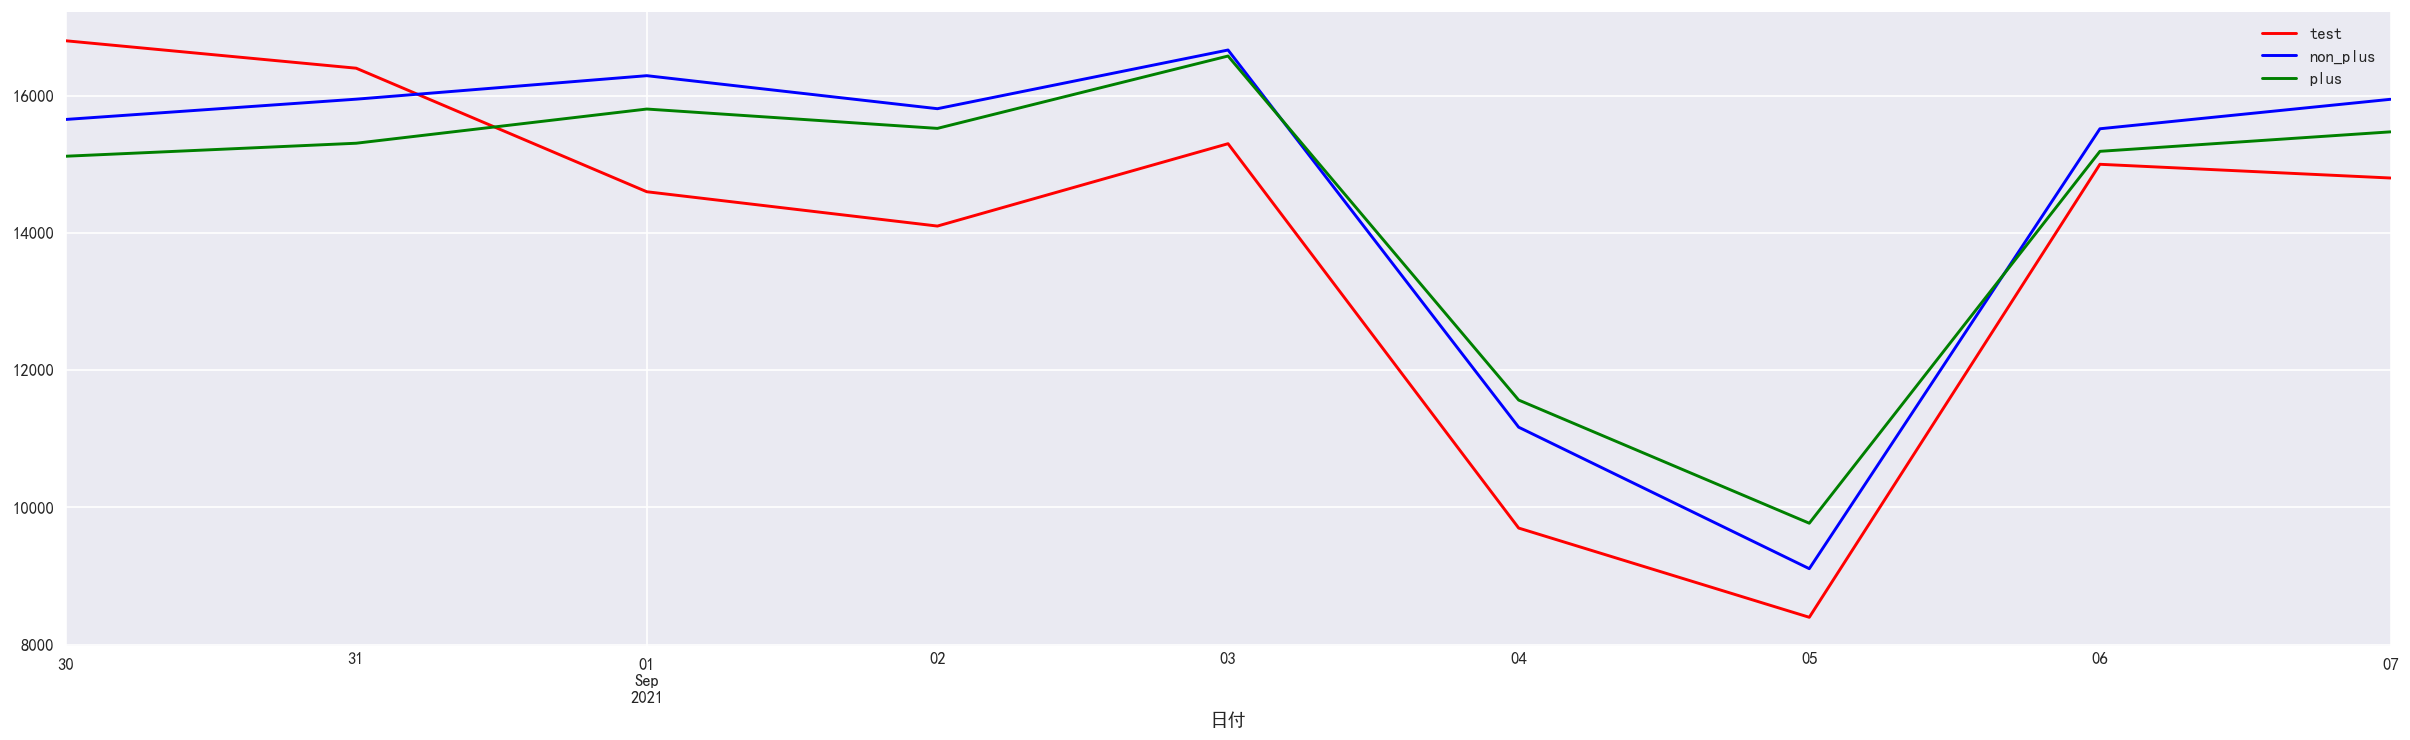

In [95]:
plt.figure(figsize=(25,7),dpi=120)
test.plot(color='r',label='test')
non_plus.plot(color='b',label='non_plus')
plus.plot(color='g',label='plus')
plt.legend()

pos:    '飲み会','チケット','温泉','自転車','旅行'
nega:  'デリバリー','マスク','緊急事態宣言','大雨', 'コンビニ','台風','リモート とは','リモートワーク','漫画'

In [49]:
pos1 = word[['飲み会','チケット','温泉','自転車','旅行']].mean(axis=1)
naga1 = word[['デリバリー','マスク','緊急事態宣言','大雨', 'コンビニ','台風','リモート とは','リモートワーク','漫画']].mean(axis=1)

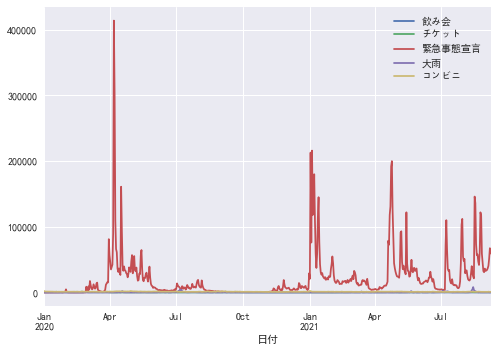

In [57]:
word[['飲み会','チケット','緊急事態宣言','大雨', 'コンビニ']].plot()

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


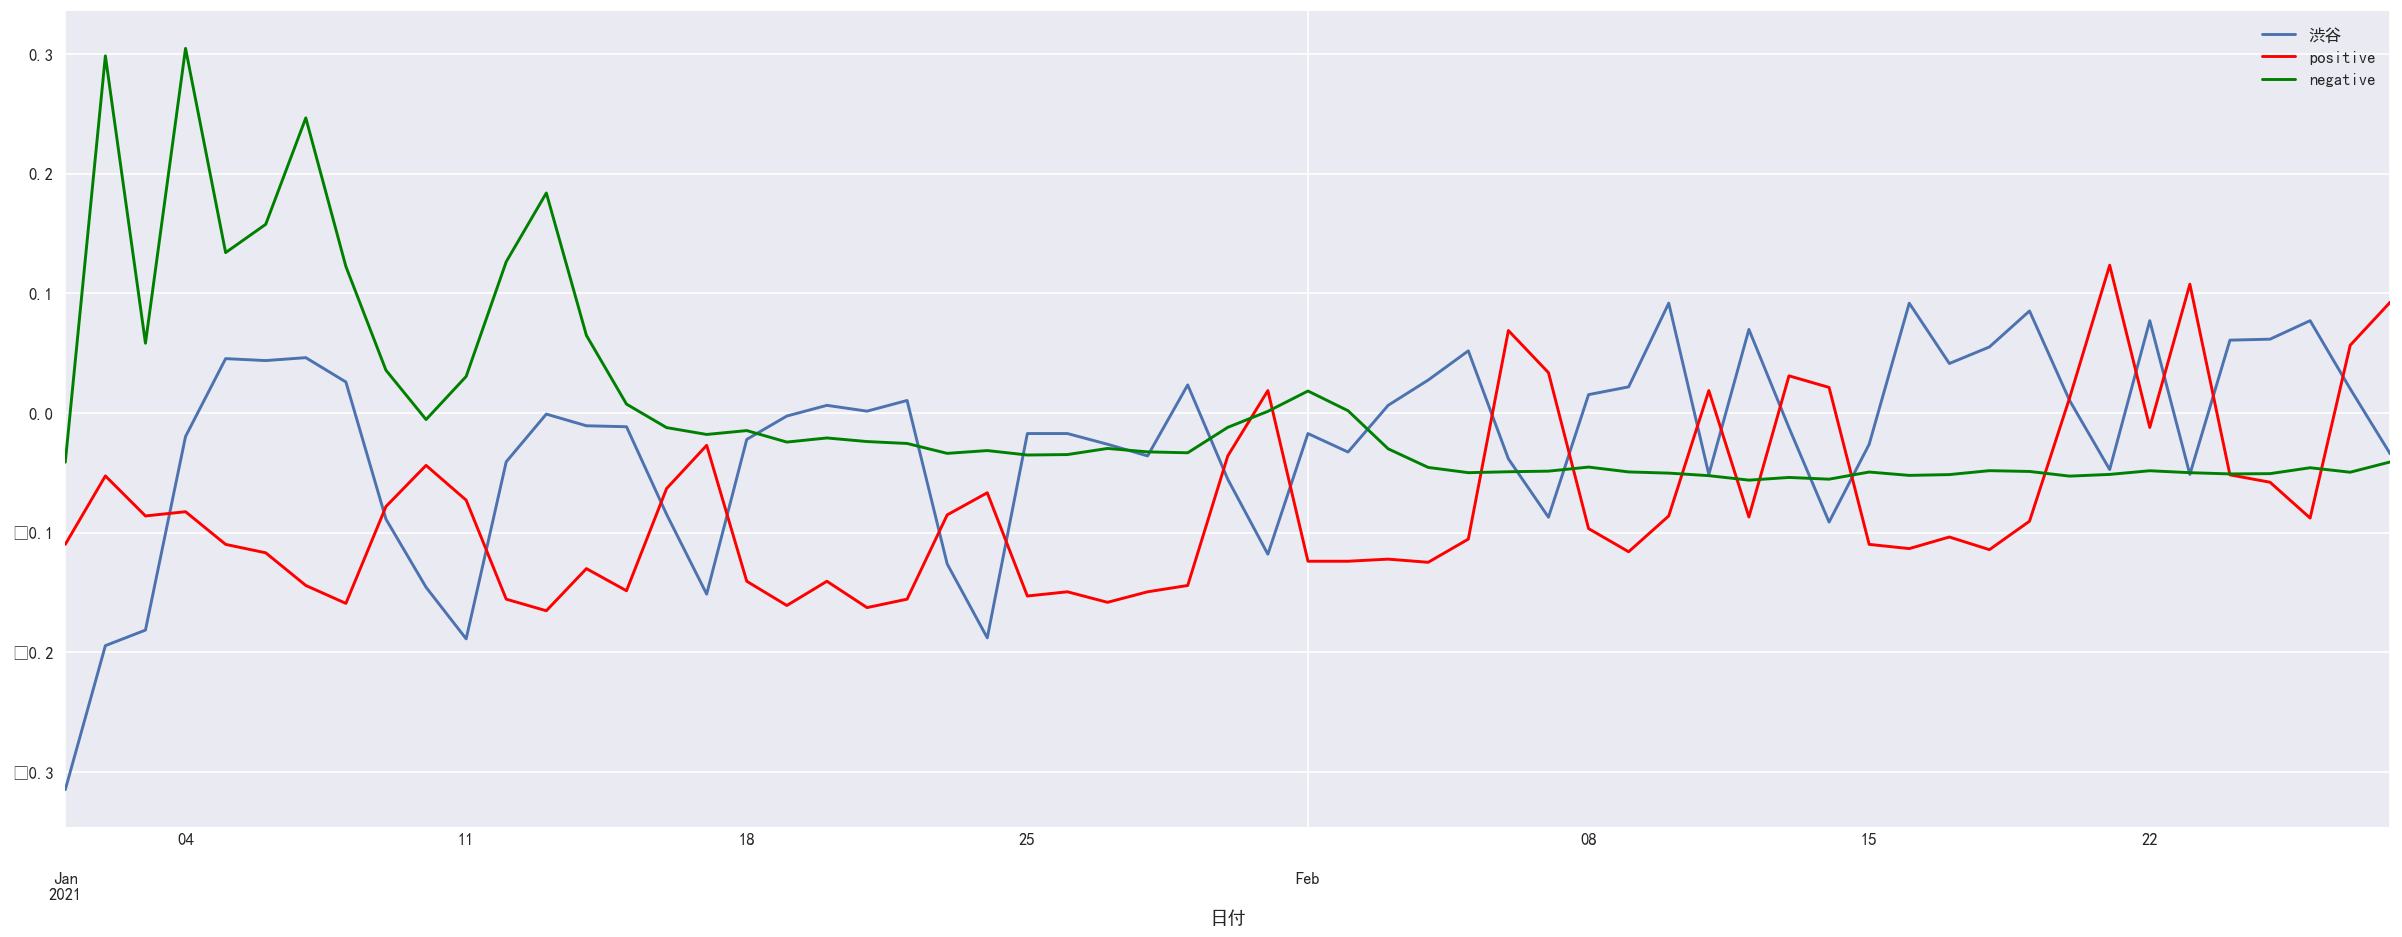

In [48]:
plt.figure(figsize=(25,9),dpi=120)
normalize(sibu)['2021-01':'2021-02'].plot()
normalize(pos1)['2021-01':'2021-02'].plot(color='r',label="positive")
normalize(naga1)['2021-01':'2021-02'].plot(color='g',label="negative")
plt.legend()

<Figure size 576x396 with 0 Axes>

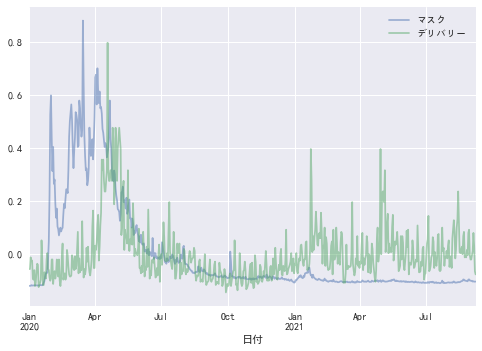

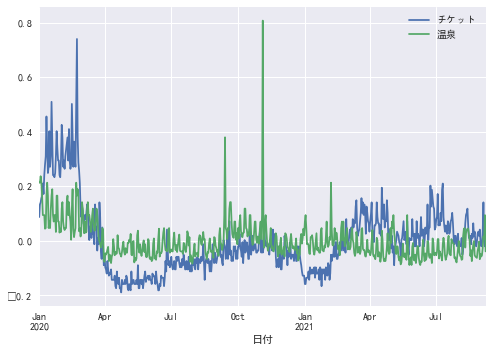

In [131]:
from collections import defaultdict
alist = list(zip(y_pre,sibu_words))
genre = defaultdict(list)
for group in alist:
    feature_type = group[0]
    feature = group[1]
    genre[feature_type].append(feature)

nega = genre.get(0)
posi = genre.get(1)

plt.figure()
sibu_word_data[nega[:2]].plot(alpha=0.5)
sibu_word_data[posi[:2]].plot()

## 调试

针对每个地点设置，目前是涉谷

+ 第一个手段：将0.75分位值以上的数据设为高值，筛选有联系的单词
   + 尚不稳定，多循环几次，选出前10名的关键词?
   + 对单词进行聚类
+ 第二个手段：lag=1的数据，增加的设为1，筛选有联系的单词 -> 不行
+ 找新的数据，特别是涉谷的

In [43]:
res = sm.tsa.seasonal_decompose(sibu,model='multiplicative')
# 有乘法模型与加法模型 O(t)=T(t)×S(t)×I(t) O(t)=T(t)+S(t)+I(t) 
res.trend # 分解出整体趋势
res.seasonal # 分解出同样变化
res.resid # 剩余

日付
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04    1.173986
2020-01-05    1.012588
                ...   
2021-09-03    0.941123
2021-09-04    1.083770
2021-09-05         NaN
2021-09-06         NaN
2021-09-07         NaN
Name: resid, Length: 616, dtype: float64

In [82]:
word.columns

Index(['新宿', '八王子', '大阪', '札幌', '福岡', '東京 コロナ', 'コロナ 感染者数', 'コロナ ワクチン',
       'コロナ 初期症状', 'コロナ 潜伏期間', '緊急事態宣言', '緊急事態宣言 再発令', '緊急事態宣言とは', '緊急事態宣言 解除',
       '福岡県 コロナウイルス感染者', 'リモート とは', 'テイクアウト', 'コンビニ', 'マスク', '美容院', 'カラオケ',
       '新幹線', 'レシピ', '動画', '漫画', 'ゲーム', '自転車', '台風'],
      dtype='object')

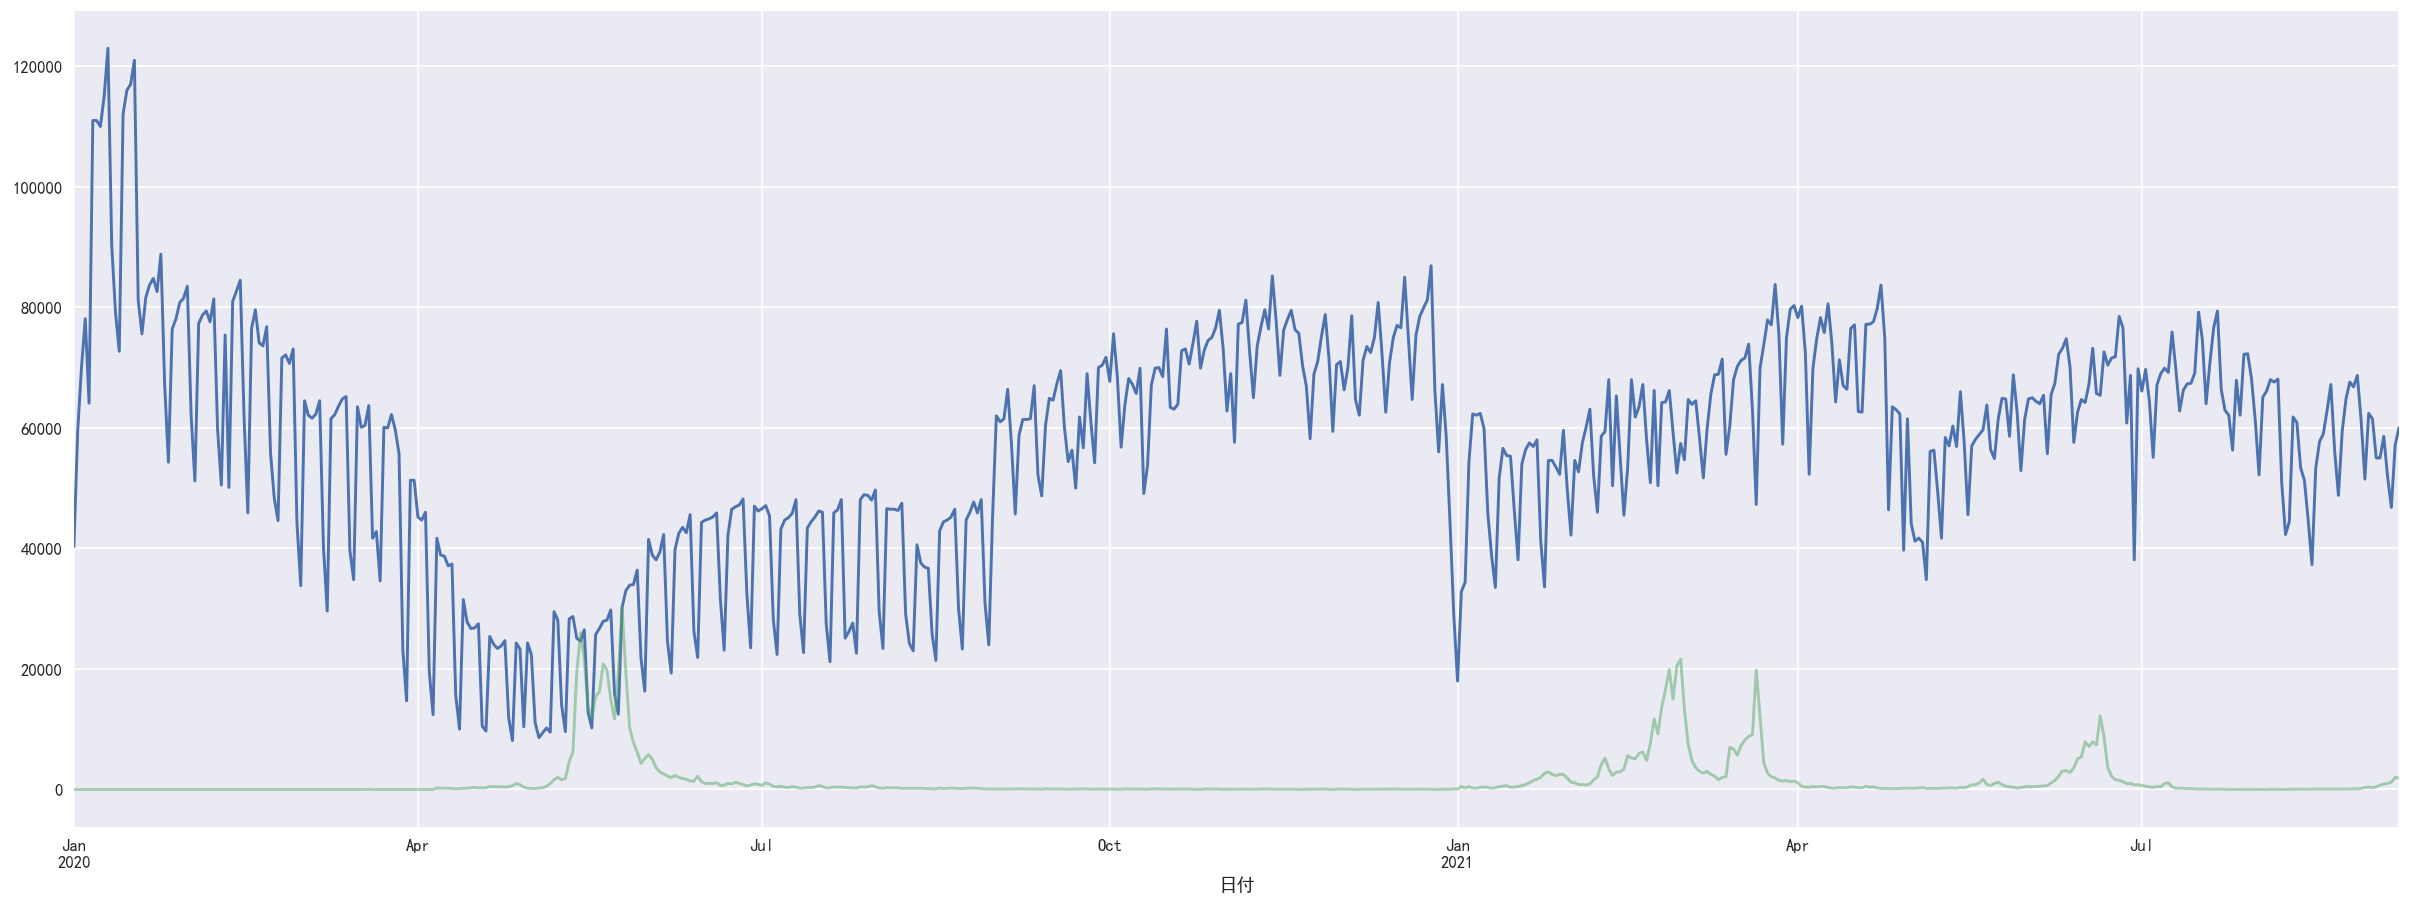

In [83]:
plt.figure(figsize=(25,9),dpi=120)
sibu.plot()
word['緊急事態宣言 解除'].plot(alpha=0.5)